In [1]:
import numpy as np 
from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import animation
%matplotlib inline 

In [2]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(size=40)
y = np.sin(x * 1.5 * np.pi) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean()
y_noise = y_noise.reshape((-1,1))
X = np.vstack((2*x,x**2)).T

In [3]:
def L2(theta): 
    h = X @ theta
    return np.sum(1./(2.*float(y_noise.shape[0]))*(y_noise - h).T @ (y_noise - h)) 

def coordinate_descent(_theta, alpha=0.03, n_iter=100): 
    theta = _theta.copy()
    l2_hist = [] 
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards

    for i in range(n_iter): 
        for j in range(X.shape[1]): 
            h = X @ theta
            gradient = (X[:,j] @ (h-y)) 
            
            theta[j] -= alpha * gradient
            l2_hist.append(L2(theta))
            theta_0_hist.append(theta[0])
            theta_1_hist.append(theta[1])
    return theta, l2_hist, theta_0_hist, theta_1_hist

In [10]:
thetai = np.array([4,-4.]).T
theta_result_c, J_history_c, theta_0_c, theta_1_c  = coordinate_descent(thetai, alpha=0.009, n_iter=100)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


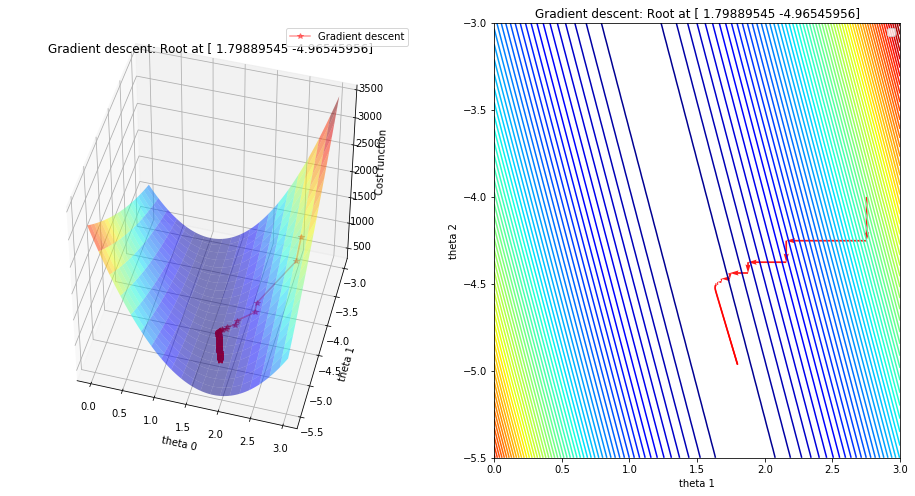

In [11]:
#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(0,3,100),np.linspace(-5.5,-3,100))

#Computing the cost function for each theta combination
zs = np.array(  [L2(np.array([t0,t1]).T) for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)

#Angles needed for quiver plot
anglesx = np.array(theta_0_c)[1:] - np.array(theta_0_c)[:-1]
anglesy = np.array(theta_1_c)[1:] - np.array(theta_1_c)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0_c,theta_1_c,J_history_c, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.view_init(45, -75)
ax.legend()


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0_c[:-1], theta_1_c[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Gradient descent: Root at {}'.format(theta_result_c.ravel()))
ax.legend()

plt.legend()
plt.show()